In [1]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

import pickle

import matplotlib

# matplotlib.rcParams['text.usetex'] = True

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

In [2]:
dataset = 'sim-pred-prey-100-16-50-100-100-0'
root = '../../experiments/predator-prey/results'

In [3]:
models = [
    ['convGNP', 'meanfield', 'hetero', 'identity'],
    ['convGNP', 'meanfield', 'hetero', 'exponential'],
    ['convGNP', 'innerprod', 'hetero', 'identity'],
    ['convGNP', 'innerprod', 'hetero', 'exponential'],
    ['convGNP', 'kvv', 'hetero', 'identity'],
    ['convGNP', 'kvv', 'hetero', 'exponential'],
    ['convNP', 'meanfield', 'homo', 'identity']
]

model_names = [
    'convgnp-meanfield-identity',
    'convgnp-meanfield-exponential',
    'convgnp-innerprod-identity',
    'convgnp-innerprod-exponential',
    'convgnp-kvv-identity',
    'convgnp-kvv-exponential',
    'convnp-meanfield'
]

In [12]:
def get_model_log_likelihood(root, dataset, model, cov, noise, marginal):
    
    filename = f'{root}/{dataset}/models/{model}/{cov}/{noise}/{marginal}/seed-0/test_log_likelihood.txt'
    
    file = open(filename, 'r')
    nll = file.read()[:-2]
    
    return -float(nll)

In [13]:
markers = ['^',
           'D',
           '^',
           'D',
           '^',
           'D',
           'X',
           '*']

colors = ['tab:red',
          'tab:red',
          'tab:green',
          'tab:green',
          'tab:blue',
          'tab:blue',
          'tab:purple',
          'tab:orange']

legend_labels = ['ConvGNP (meanfield)  ',
                 'ConvGCNP (meanfield)',
                 'ConvGNP (linear)  ',
                 'ConvGCNP (linear)',
                 'ConvGNP (kvv)  ',
                 'ConvGCNP (kvv)',
                 'ConvNP',
                 'FullConvGNP']

In [15]:
results = {}
    
for model_name, (model, cov, noise, marginal) in zip(model_names, models):

    loglik = get_model_log_likelihood(root=root,
                                      dataset=dataset,
                                      model=model,
                                      cov=cov,
                                      noise=noise,
                                      marginal=marginal)

    results[model_name] = loglik

# with open('pred-prey-results.pkl', 'wb') as file:
#     pickle.dump(results, file)

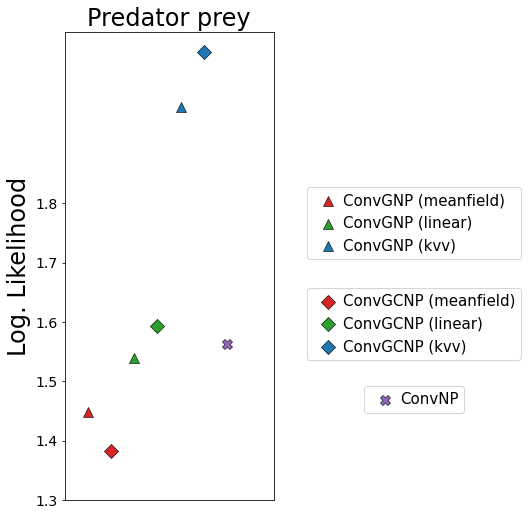

In [16]:
results = None
with open('pred-prey-results.pkl', 'rb') as file:
    results = pickle.load(file)
    
    
fig = plt.figure(figsize=(4., 7))

for j, (model_name, (model, cov, noise, marginal), (marker, color)) in enumerate(zip(model_names, models, zip(markers, colors))):

    loglik = results[model_name]

    plt.scatter(j,
                loglik,
                marker=marker,
                c=color,
                zorder=2,
                s=100,
                linewidth=0.6,
                edgecolor='k',
                label=legend_labels[j])

plt.title(f'Predator prey', fontsize=24)
plt.xticks([])
plt.yticks(np.linspace(1.3, 1.8, 6), fontsize=14)
plt.xlim([-1., 8.])
# plt.ylim([1.25, 1.85])

plt.ylabel('Log. Likelihood', fontsize=24)

handles, labels = plt.gca().get_legend_handles_labels()

fig.legend(handles[:-1][::2], labels[:-1][::2], loc='center', ncol=1, fontsize=15, bbox_to_anchor=(1.2, 0.0, 0.5, 1.1), handletextpad=0.01, columnspacing=2.0)
fig.legend(handles[1:-1][::2], labels[1:-1][::2], loc='center', ncol=1, fontsize=15, bbox_to_anchor=(1.2, 0.0, 0.5, 0.7), handletextpad=0.01, columnspacing=2.0)
fig.legend(handles[-1:], labels[-1:], loc='center', ncol=1, fontsize=15, bbox_to_anchor=(1.2, 0.0, 0.5, 0.4), handletextpad=0.01, columnspacing=2.0)

plt.tight_layout()
fig.subplots_adjust(bottom=0.)
plt.savefig('pred-prey-results.pdf')
plt.show()